In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
#pandas_datareader, get_data_tiingo
#why apple is not able to grow like it used to do in pre covid era

In [ ]:
apple = pd.read_csv('/content/drive/MyDrive/fourth-sem/sem-LONG-project/apple.csv')

In [ ]:
apple.head(7)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2018-03-22 00:00:00+00:00,168.85,172.68,168.60,170.00,41051076,40.187582,41.099151,40.128080,40.461291,164204304,0.0,1.0
1,1,AAPL,2018-03-23 00:00:00+00:00,164.94,169.92,164.94,168.39,40248954,39.256972,40.442250,39.256972,40.078099,160995816,0.0,1.0
2,2,AAPL,2018-03-26 00:00:00+00:00,172.77,173.10,166.44,168.07,36272617,41.120572,41.199114,39.613984,40.001936,145090468,0.0,1.0
3,3,AAPL,2018-03-27 00:00:00+00:00,168.34,175.15,166.92,173.68,38962839,40.066198,41.687030,39.728227,41.337159,155851356,0.0,1.0
4,4,AAPL,2018-03-28 00:00:00+00:00,166.48,170.02,165.19,167.25,41668545,39.623504,40.466051,39.316474,39.806770,166674180,0.0,1.0
5,5,AAPL,2018-03-29 00:00:00+00:00,167.78,171.75,166.90,167.81,38398505,39.932914,40.877804,39.723467,39.940054,153594020,0.0,1.0
6,6,AAPL,2018-04-02 00:00:00+00:00,166.68,168.94,164.47,166.64,37586791,39.671106,40.209003,39.145109,39.661585,150347164,0.0,1.0


<Axes: >

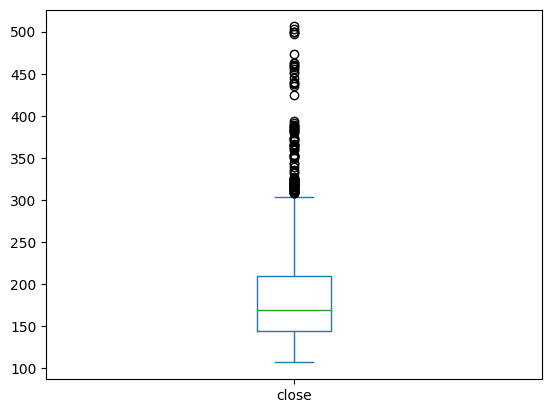

In [ ]:
apple['close'].plot(kind = 'box')

<Axes: >

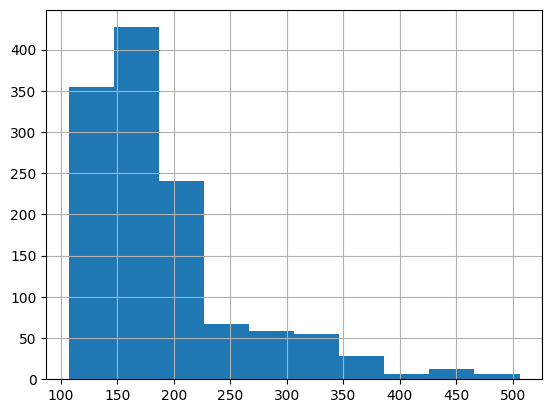

In [ ]:
apple['close'].hist()

In [ ]:
apple2 = apple.reset_index()['close']
layout = go.Layout( title = 'STOCK PRICE OF APPLE' , 
                   xaxis = dict(title = 'Day' , titlefont = dict(size = 18 , family = 'Sans serif' , color = 'red')),
                   yaxis = dict(title = 'price' , titlefont = dict(size = 18 , family = 'Sans serif' , color = 'red')))
graph1 = apple2.index
graph2 = apple.close
apple_data = [{'x':graph1 , 'y':graph2}]
plot1 = go.Figure(data = apple_data , layout = layout)
iplot(plot1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
apple2 = scaler.fit_transform(np.array(apple2).reshape(-1,1))

In [ ]:
training_size = int(len(apple2)*0.65)
test_size = len(apple2) - training_size
train_data , test_data = apple2[:training_size] , apple2[training_size:len(apple2)]

In [ ]:
import numpy
def dataset_creator(dataset , time_step = 1):
    X_data , y_data = [] , []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step) , 0]
        X_data.append(a)
        y_data.append(dataset[i+time_step , 0])
    return np.array(X_data) , np.array(y_data)

In [ ]:
time_step = 100
X_train , y_train = dataset_creator(train_data , time_step)
X_test , y_test = dataset_creator(test_data , time_step)

In [ ]:
X_train.shape

(716, 100)

In [ ]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [ ]:
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
from keras.models import Sequential

In [ ]:
seq = Sequential()
seq.add(LSTM(50 , return_sequences = True , input_shape = (100,1)))
seq.add(LSTM(50 , return_sequences = True))
seq.add(LSTM(50))
seq.add(Dense(1))
seq.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [ ]:
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
seq.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
12/12 [==============================] - 12s 116ms/step - loss: 0.0362 - val_loss: 6.9328e-04
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0142 - val_loss: 0.0031
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 6.4370e-04
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0089 - val_loss: 5.0710e-04
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0084 - val_loss: 3.5176e-04
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0072 - val_loss: 0.0020
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0081 - val_loss: 6.2238e-04
Epoch 8/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0066 - val_loss: 6.0925e-04
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0061 - val_loss: 6.3061e-04
Epoch 10/100
12/12 [==============================] - 0s 25ms/step - l

In [ ]:
train_predict = seq.predict(X_train)
test_predict = seq.predict(X_test)

11/11 [==============================] - 0s 6ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#finding root mean squared error
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

235.73422237254636

In [ ]:
math.sqrt(mean_squared_error(y_test , test_predict))

157.12303124124477

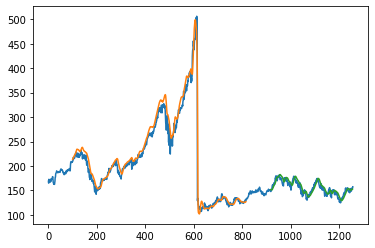

In [ ]:
past_days = 100
#shift train predictions for plotting
trainpred_plot = numpy.empty_like(apple2)
trainpred_plot[:,:] = np.nan
trainpred_plot[past_days:len(train_predict)+past_days , :] = train_predict
#shift test prediction for plotting
testpred_plot = numpy.empty_like(apple2)
testpred_plot[:,:] = numpy.nan
testpred_plot[len(train_predict) + (past_days*2) + 1:len(apple2) - 1 , :] = test_predict
#plotting test and predicted lines
plt.plot(scaler.inverse_transform(apple2) , label = 'actual')
plt.plot(trainpred_plot , label = 'predicted')
plt.plot(testpred_plot , label = 'predicted')
plt.legend()
plt.show()


In [ ]:
import pickle

In [ ]:
pickle.dump(seq , open("/content/drive/MyDrive/fourth-sem/sem-LONG-project/models/apple_predictor.pkl" , 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-26 09:33:32         